In [44]:
import cmath
import networkx as nx
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np
import random

# Opgave 1 *

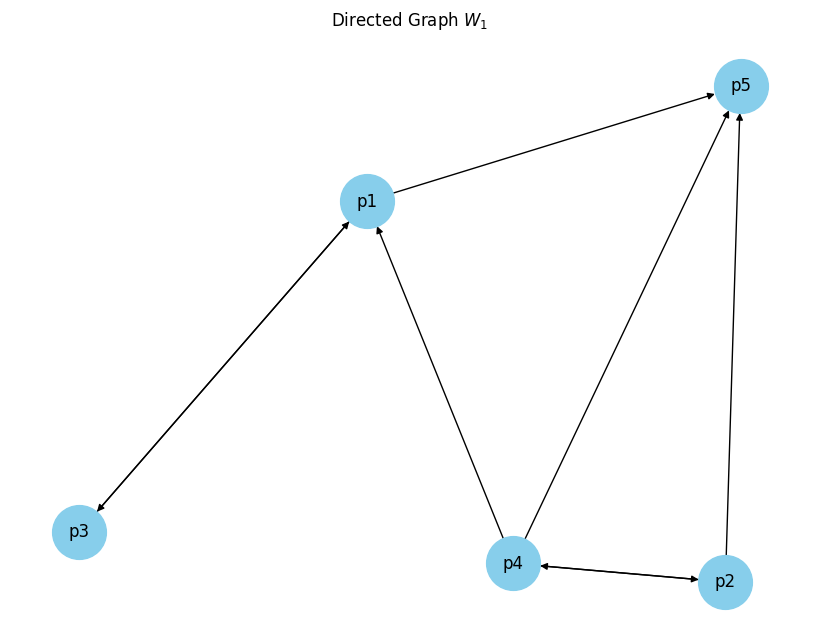

In [45]:
G = nx.DiGraph()

nodes = ['p1', 'p2', 'p3', 'p4', 'p5']
G.add_nodes_from(nodes)

edges = [('p1', 'p3'), ('p1', 'p5'),
         ('p2', 'p4'), ('p2', 'p5'),
         ('p3', 'p1'),
         ('p4', 'p1'), ('p4', 'p2'), ('p4', 'p5')]

G.add_edges_from(edges)

pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, arrows=True, node_color='skyblue', node_size=1500, font_size=12)
plt.title("Directed Graph $W_1$")
plt.show()


# Opgave 2 *

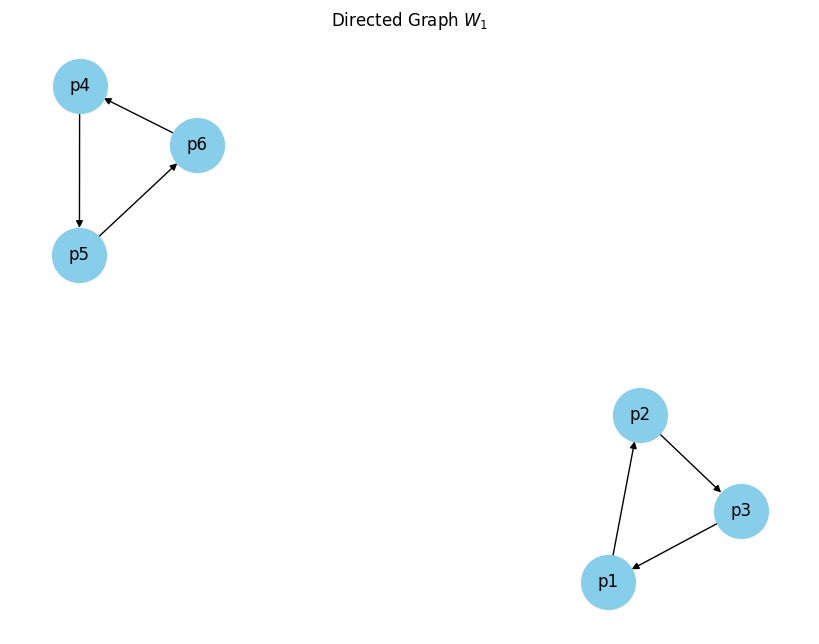

In [46]:
G = nx.DiGraph()

nodes = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6']
G.add_nodes_from(nodes)

edges = [('p1', 'p2'),
         ('p2', 'p3'),
         ('p3', 'p1'),
         ('p4', 'p5'),
         ('p5', 'p6'),
         ('p6', 'p4')]

G.add_edges_from(edges)

pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, arrows=True, node_color='skyblue', node_size=1500, font_size=12)
plt.title("Directed Graph $W_1$")
plt.show()


# Opgave 3 & 4 *

In [47]:


# Definition af netværket
W1 = {
    'P1': {'P2', 'P3'},
    'P2': {'P3'},
    'P3': {'P1'},
    'P4': {'P5'},
    'P5': {}
}

W2 = {
    'P1': {'P2'},
    'P2': {'P3'},
    'P3': {'P1'},
    'P4': {'P5'},
    'P5': {'P6'},
    'P6': {'P4'}
}

def makeAdjacencyMatrix(W):
    nodes = list(W.keys())
    length = len(nodes)  
    
    output = np.zeros((length, length), dtype=int)
    
    node_index = {node: idx for idx, node in enumerate(nodes)}
    
    for i, node in enumerate(nodes):
        for neighbor in W[node]:
            j = node_index[neighbor]  
            output[i][j] = 1  
    
    return output

# Test function
print("W1")
print(makeAdjacencyMatrix(W1))
print("\nW2")
print(makeAdjacencyMatrix(W2))

W1
[[0 1 1 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 0 0]]

W2
[[0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 1]
 [0 0 0 1 0 0]]


# Opgave 5

In [ ]:
import numpy as np

def checkArrayValue(array,value):
    for i in range(0,len(array)):
        if array[i] == value:
            return True
        
    return False

def make_web(n,k,kmin=0):

    # Input: n og k er ikke-negative heltal
    # Output: web er en dictionary med n nøgler.
    # Værdien af hver nøgle er en liste, der er en delmængde af nøglerne.
    
    assert(k < n), "k skal være mindre end n (da man ikke kan linke til sig selv)"
    assert(kmin <= k), "kmin skal være mindre end eller lig med k"
    keys = list(i for i in range(n)) # definerer n nøgler fra 0 til n-1 
    web = dict()
    
    for j in keys:
        numlinks = np.random.randint(kmin, k + 1) 
        links = list(np.random.choice([x for x in keys if x != j], size=numlinks, replace=False))
        web[j] = links 

    return web

print(make_web(100,99,50))

{0: [51, 25, 56, 93, 27, 74, 54, 83, 35, 14, 26, 68, 44, 23, 4, 37, 58, 77, 38, 89, 9, 40, 97, 18, 73, 22, 53, 30, 7, 64, 63, 92, 87, 86, 31, 19, 1, 55, 6, 10, 39, 76, 12, 61, 16, 34, 15, 96, 11, 5, 2, 99, 47, 72, 42, 49, 78, 75, 21, 80, 62, 79, 29, 45, 90, 84, 91, 33, 71, 70, 52, 46, 36, 81, 95, 69, 50, 20, 57, 85, 65, 94, 24, 3, 88, 60, 43], 1: [66, 91, 67, 4, 85, 6, 48, 56, 62, 60, 78, 98, 76, 5, 55, 80, 23, 71, 10, 37, 73, 17, 74, 20, 30, 53, 97, 83, 92, 75, 77, 84, 43, 87, 52, 99, 22, 64, 8, 35, 18, 2, 41, 70, 36, 86, 59, 42, 0, 88, 95, 15, 93, 96, 50, 21, 90, 61, 69, 94, 31, 63, 7, 9], 2: [32, 37, 78, 3, 30, 83, 95, 98, 40, 5, 92, 29, 75, 62, 54, 91, 65, 34, 53, 18, 25, 45, 60, 93, 90, 58, 0, 51, 24, 84, 97, 10, 56, 16, 42, 73, 67, 71, 72, 69, 46, 11, 43, 48, 64, 33, 27, 96, 13, 99, 49, 7, 59, 17, 22, 4, 23, 21, 68, 19, 66, 8, 52, 76, 15, 87, 50, 77, 70, 35, 88, 38, 94, 1, 79, 85, 47, 82, 14, 39, 80, 28, 81, 55, 12, 74, 31, 57, 63, 9, 86, 20, 36], 3: [58, 46, 26, 96, 30, 15, 39, 

# Opgave 6 *